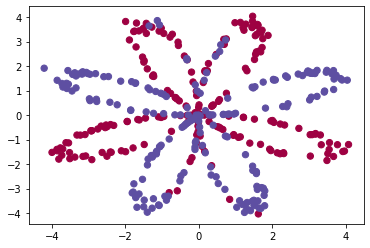

In [1]:
from planar_utils import plot_decision_boundary, sigmoid, load_planar_dataset, load_extra_datasets
import matplotlib.pyplot as plt

X, Y = load_planar_dataset()
plt.scatter(X[0, :], X[1, :], c=Y.ravel(), s=40, cmap=plt.cm.Spectral);

In [3]:
import torch
import torchvision

In [17]:
dataset = torch.utils.data.TensorDataset(torch.tensor(X.T, dtype=torch.float32), torch.tensor(Y.T, dtype=torch.float32))

In [18]:
# Data loader
batch_size = 400
train_loader = torch.utils.data.DataLoader(dataset=dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

In [19]:
model = torch.nn.Sequential(torch.nn.Linear(2, 4), torch.nn.Tanh(), torch.nn.Linear(4, 1), torch.nn.Sigmoid())

In [20]:
creterion = torch.nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

In [22]:
for epoch in range (10000):
    for x, y in train_loader:
        output = model(x)
        loss = creterion(output, y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    if epoch % 100 == 0:
        print(epoch, loss.item())


0 0.6879833340644836
100 0.6770990490913391
200 0.6695027947425842
300 0.6637411713600159
400 0.6590039730072021
500 0.6548279523849487
600 0.6509371995925903
700 0.647158682346344
800 0.6433759927749634
900 0.639503002166748
1000 0.6354668736457825
1100 0.6311995983123779
1200 0.6266350746154785
1300 0.6217133402824402
1400 0.6163885593414307
1500 0.610637903213501
1600 0.6044656038284302
1700 0.5979021191596985
1800 0.5909987092018127
1900 0.5838209390640259
2000 0.5764432549476624
2100 0.5689417123794556
2200 0.5613897442817688
2300 0.5538541674613953
2400 0.5463922619819641
2500 0.5390512347221375
2600 0.5318684577941895
2700 0.5248720049858093
2800 0.5180823802947998
2900 0.5115134716033936
3000 0.5051741003990173
3100 0.49906861782073975
3200 0.49319812655448914
3300 0.48756131529808044
3400 0.4821546673774719
3500 0.47697317600250244
3600 0.47201091051101685
3700 0.46726104617118835
3800 0.46271613240242004
3900 0.45836833119392395
4000 0.4542097747325897
4100 0.4502323567867279

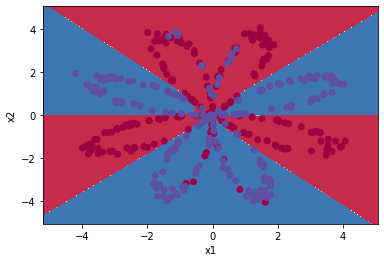

In [25]:
for x, y in train_loader:
    output = model(x)
    plot_decision_boundary(lambda x: model(torch.tensor(x,dtype=torch.float32)) > 0.5, X, Y)